# Deriving Confidence Intervals for the $\chi^2$ Test for Goodness of Fit

## Background

### What is a $\chi^2$ test?

$\chi^2$ tests are fundamentally based on the $\chi^2$ statistic:

$$
\chi^2 = \sum\frac{(\text{Obs} - \text{Exp})^2}{\text{Exp}}
$$

The P-value is then determined from the $\chi^2$ distribution with a suitable degree of freedom:

$$
P = \int_{\chi^2}^\infty \chi^2_k\text{-pdf}(t)\,dt
$$

<a title="Geek3, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Chi-square_pdf.svg"><img width="512" alt="Chi-square distribution plots for varying degrees of freedom." src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/512px-Chi-square_pdf.svg.png?20141208104029"></a>

<a href="https://commons.wikimedia.org/wiki/File:Chi-square_pdf.svg">Geek3</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

If the P-value is less than the significance level $\alpha$, we reject the null hypothesis. At the fundamental level, the null hypothesis always states that multiple distributions of categories matches one another (either between a sample and a known population, between two samples, or within one sample between different values of one variable).

However, because multiple categories are involved, it is not obvious how to construct an equivalent confidence interval for $\chi^2$ tests. This can be demonstrated by the difficulty in completing the following statement:

> I am XX% confident that the interval `____` captures `____`.

How can _one_ interval capture variability spread across _multiple_ categories? Should there be an interval for each category? If that's the case, what does the confidence level even _mean_?

This project attempts to resolve this lack of clarity by deriving a clearly-defined confidence interval, specifically for the $\chi^2$ test for goodness of fit.

### Why goodness of fit?

This project restricts the scope of the confidence interval to goodness-of-fit (GOF) tests only. This is because it is the most natural to ask the question "what could the population look like?" when only one categorical sample is given. For multiple samples/variables, it is much more common to proceed with the $\chi^2$ *test* for homogeneity/independence instead.

### Counts and the multinomial distribution

The first assumption to check when performing a $\chi^2$ test is that the data must be counts. But what are counts, exactly?

> Counts are the artifacts of a multinomial distribution for a categorical variable.

Let us first consider a Bernoulli trial with probability of success $p$. The _binomial_ distribution gives the expected value and standard deviation as follows:

$$
\begin{align*}
    E(X) &= np \\
    SD(X) &= \sqrt{np(1-p)} \\
\end{align*}
$$

where $X$ is defined as number of successes in $n$ trials.

In the case of counts, there are more than two outcomes. In fact, each catogory (or "column", in a typical $\chi^2$ test table) represents one possible outcome. Let $X_i$ be the number of trials that result in the $i$th outcome over $n$ trials. Then $X_i$ follow the _multinomial_ distribution:

$$
\begin{align*}
    E(X_i) &= np_i \\
    SD(X_i) &= \sqrt{np_i(1-p_i)} \\
\end{align*}
$$

Notice how the two equations are exactly the same as the binomial distribution. Intuitively, this makes sense, since we can mentally "merge" all categories that is not the $i$th one into one big category: the "not $i$th" category. In that case, the scenario simplifies to a basic Bernoulli trial/binomial distribution.

The next example is generated from 5000 random samples of size 200 with the following probability distribution:

|  Category   |   A   |   B   |   C   |   D   |
| ----------- | :---: | :---: | :---: | :---: |
| Probability |  0.1  |  0.2  |  0.3  |  0.4  |

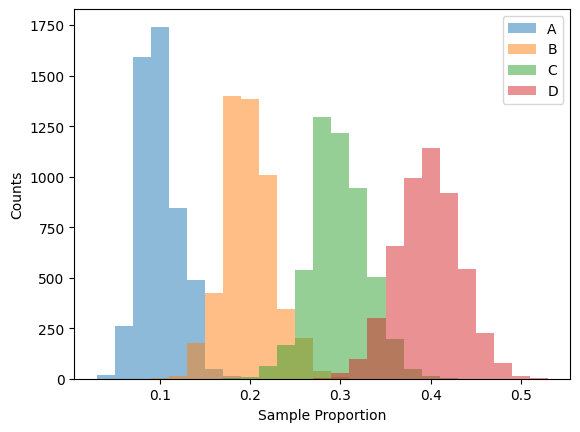

Notice how each of the four categories follow a binomial (approximately normal) sampling distribution.

This observation is going to be the eventual foundation of this project.

## An (unsuccessful) simple attempt

In the case of a one-proportion z-test, we can simulate the hypothesis test by creating a confidence interval from the sample proportion. If the given population proportion falls outside the interval, then we can conclude that there is evidence that the actual population proportion is different (or has changed). Specifically, a two-tailed z-test with significance level $\alpha$ corresponds to a confidence interval with confidence level $(1 - \alpha)$.

<a title="Smahdavi4, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Null-hypothesis-region-eng.png"><img width="512" alt="Null-hypothesis-region-eng" src="https://upload.wikimedia.org/wikipedia/commons/0/0b/Null-hypothesis-region-eng.png?20190725074137"></a>

<a href="https://commons.wikimedia.org/wiki/File:Null-hypothesis-region-eng.png">Smahdavi4</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

> Could we translate this analogy into the language of $\chi^2$ tests?

Our very first obstacle is that the data are discrete counts, not proportions. This is easily fixed by dividing the counts by the sample size. After that, one potential way to approach this problem is to define the lower and upper limits of the interval for each category as the population proportion (for that category) with which it is just barely possible to avoid rejecting the null hypothesis with the given sample proportions.

However, this approach does not clearly answer the question stated in the first section:

> I am XX% confident that the interval `____` captures `____`.

since it does not guarantee that out of all possible samples of sample size $n$, XX% of the corresponding confidence intervals would capture the true population proportion. Even if it were to do so, does every interval for every category capture the population proportion? What is the relationship across categories, as they're clearly not independent?

If you're interested in further investigating this method, Stan Brown has written an interesting [article](https://brownmath.com/stat/gof_ci.htm#CIspec2) on it.

## Adapting the one-proportion z-interval to $\chi^2$ GOF tests

Instead of attempting to reuse the relatively unfamiliar $\chi^2$ distribution, let's revert back to what we already know: the approximately normal sampling distribution created from binomial models.

For example, the following table shows a possible sample distribution as well as the corresponding 95% confidence z-interval for each of the four categories (sample size: 200).

| Category | Proportion | Confidence Interval |
| -------- | ---------- | ------------------- |
| A        | 0.075      | (0.0385, 0.1115)    |
| B        | 0.180      | (0.1268, 0.2332)    |
| C        | 0.370      | (0.3031, 0.4369)    |
| D        | 0.375      | (0.3079, 0.4421)    |

So now we can say,

> I am 95% confident that the confidence interval (0.0385, 0.1115) captures the true population proportion for category A.

(and similar statements for the remaining categories)

### Overall confidence level across multiple categories

But what if we want to do more than giving a confidence interval for one category at a time only? Could we make the following statement:

> I am XX% confident that each of the population proportions across all four categories lies within their respective confidence intervals.

We already have the intervals. They are listed in the table above. However, we do not know the confidence level. 95% is not the answer because that is the confidence level for one category only. The overall confidence level is certainly lower, since there is additional variance in the "not $i$th" category we mentioned earlier. The question is: how much lower?

The naive approach would be to multiply the confidence levels together (i.e. $0.95^4$), but that approach is incorrect because the assumption of independence is not met. In fact, the four sample proportions strictly abide by the following relationship:

$$
\sum_i \hat{p}_i = \hat{p}_A + \hat{p}_B + \hat{p}_C + \hat{p}_D = 1
$$

It is a nontrivial task to utilize this relationship to mathematically determine how the variabilities for the four sample proportions affect one another. This project makes use of a computer-based simulation to experimentally determine the overall confidence level.

## The simulation

- Simulation: The simulation consists of combinations of the following sample sizes and population proportions:

  - sample sizes $n$
    - 50
    - 100
    - 200
    - 500
    - 1000
    - 2000
  - population proportions $p_i$ where $1 \le i \le m$ and $m$ is the number of categories
    - 0.3, 0.7
    - 0.1, 0.3, 0.6
    - 0.2, 0.3, 0.5
    - 0.25, 0.35, 0.4
    - $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$
    - 0.1, 0.2, 0.3, 0.4
    - 0.15, 0.25, 0.3, 0.3
    - 0.25, 0.25, 0.25, 0.25
    - 0.1, 0.1, 0.1, 0.1, 0.6
    - 0.15, 0.15, 0.15, 0.15, 0.4
    - 0.2, 0.2, 0.2, 0.2, 0.2

  Combinations for which the success/failure condition ($np \ge 10$) isn't met are excluded from the simulation.

- Component: drawing a sample with sample size $n$ and population proportions $p_i$
- Outcome: The sample proportions are calculated by dividing counts by $n$. One-proportion z-intervals at 95% confidence level are computed from each sample proportion. The number of categories for which the true population proportion falls within the confidence interval is determined.
- Trials: 5000 trials are performed.
- Response: The proportions of samples for which $k\;(k \in \mathbb{Z}\cap [0, m])$ categories generate confidence intervals that capture their corresponding population proportions are recorded.

### Results

A total of 20 simulations was performed for each combination of $n$ and $p_i$. The following table displays the mean and standard deviation of the 20 trials for $n = 100$ and $p_i = \text{[0.15, 0.25, 0.3, 0.3]}$

|   n | $p_i$                  | $k$         |                    0 |                    1 |                    2 |                    3 |                    4 |
|----:|------------------------|-------------|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|
| 100 | [0.15, 0.25, 0.3, 0.3] | $\bar{x}_k$ |              0.00002 |              0.00143 |               0.0304 |               0.1543 |              0.81385 |
|     |                        | $s_k$       | $6.2 \times 10^{-5}$ | $5.8 \times 10^{-4}$ | $2.5 \times 10^{-3}$ | $5.0 \times 10^{-3}$ | $5.0 \times 10^{-3}$ |

Now consider two other combinations of $n$ and $p_i$:

|   n | $p_i$                  | $k = 0$ |       1 |       2 |       3 |       4 |
|----:|------------------------|--------:|--------:|--------:|--------:|--------:|
| 500 | [0.15, 0.25, 0.3, 0.3] | 0.00012 | 0.00076 | 0.03316 | 0.14449 | 0.82147 |
| 100 | [0.1, 0.2, 0.3, 0.4]   | 0.00002 | 0.00175 | 0.03398 | 0.15838 | 0.80587 |

In the first row, $n$ changed from 100 to 200. In the second row, $n$ stayed the same, while $p_i$ changed from [0.15, 0.25, 0.3, 0.3] to [0.1, 0.2, 0.3, 0.4]. For both rows, there are subtle changes in the mean across all values of $k$. Are these differences significant?